## IMPORTAMOS LIBRERÍAS

In [2]:
#Import the libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import pandas as pd


## Visualización (DEFOG) / data collect in the subject home


In [66]:
# Se carga el archivo CSV en un DataFrame 
df = pd.read_csv('test/defog/02ea782681.csv')
# Se filtra las filas
ft = ( df["Task"] == 1 ) & ( df['Valid'] == 1)
df_true = df.loc[ft]
print(df_true)

ft = ( df["Task"] == 0 ) & ( df['Valid'] == 0)
df_false = df.loc[ft]
print(df_false)

# Se guarda el archivo filtrado en otro archivo csv
# df_filtrado.to_csv('name.csv', index=False) // index == False // indica que no se debe inclúír la columna de índices en el archivo csv resultante

          Time      AccV     AccML     AccAP  StartHesitation  Turn  Walking  \
1000      1000 -0.970018  0.061626 -0.265625                0     0        0   
1001      1001 -0.984375  0.044497 -0.265625                0     0        0   
1002      1002 -0.984375  0.029016 -0.265625                0     0        0   
1003      1003 -0.984375  0.015625 -0.265625                0     0        0   
1004      1004 -0.984670  0.015330 -0.265625                0     0        0   
...        ...       ...       ...       ...              ...   ...      ...   
161902  161902 -0.984375  0.046875 -0.234375                0     0        0   
161903  161903 -0.984375  0.046875 -0.234375                0     0        0   
161904  161904 -0.999957  0.062457 -0.234375                0     0        0   
161905  161905 -1.000000  0.062500 -0.234375                0     0        0   
161906  161906 -1.000000  0.062500 -0.249732                0     0        0   

        Valid  Task  
1000     True  Tr

Text(0.5, 1.0, 'AccAP vs Time')

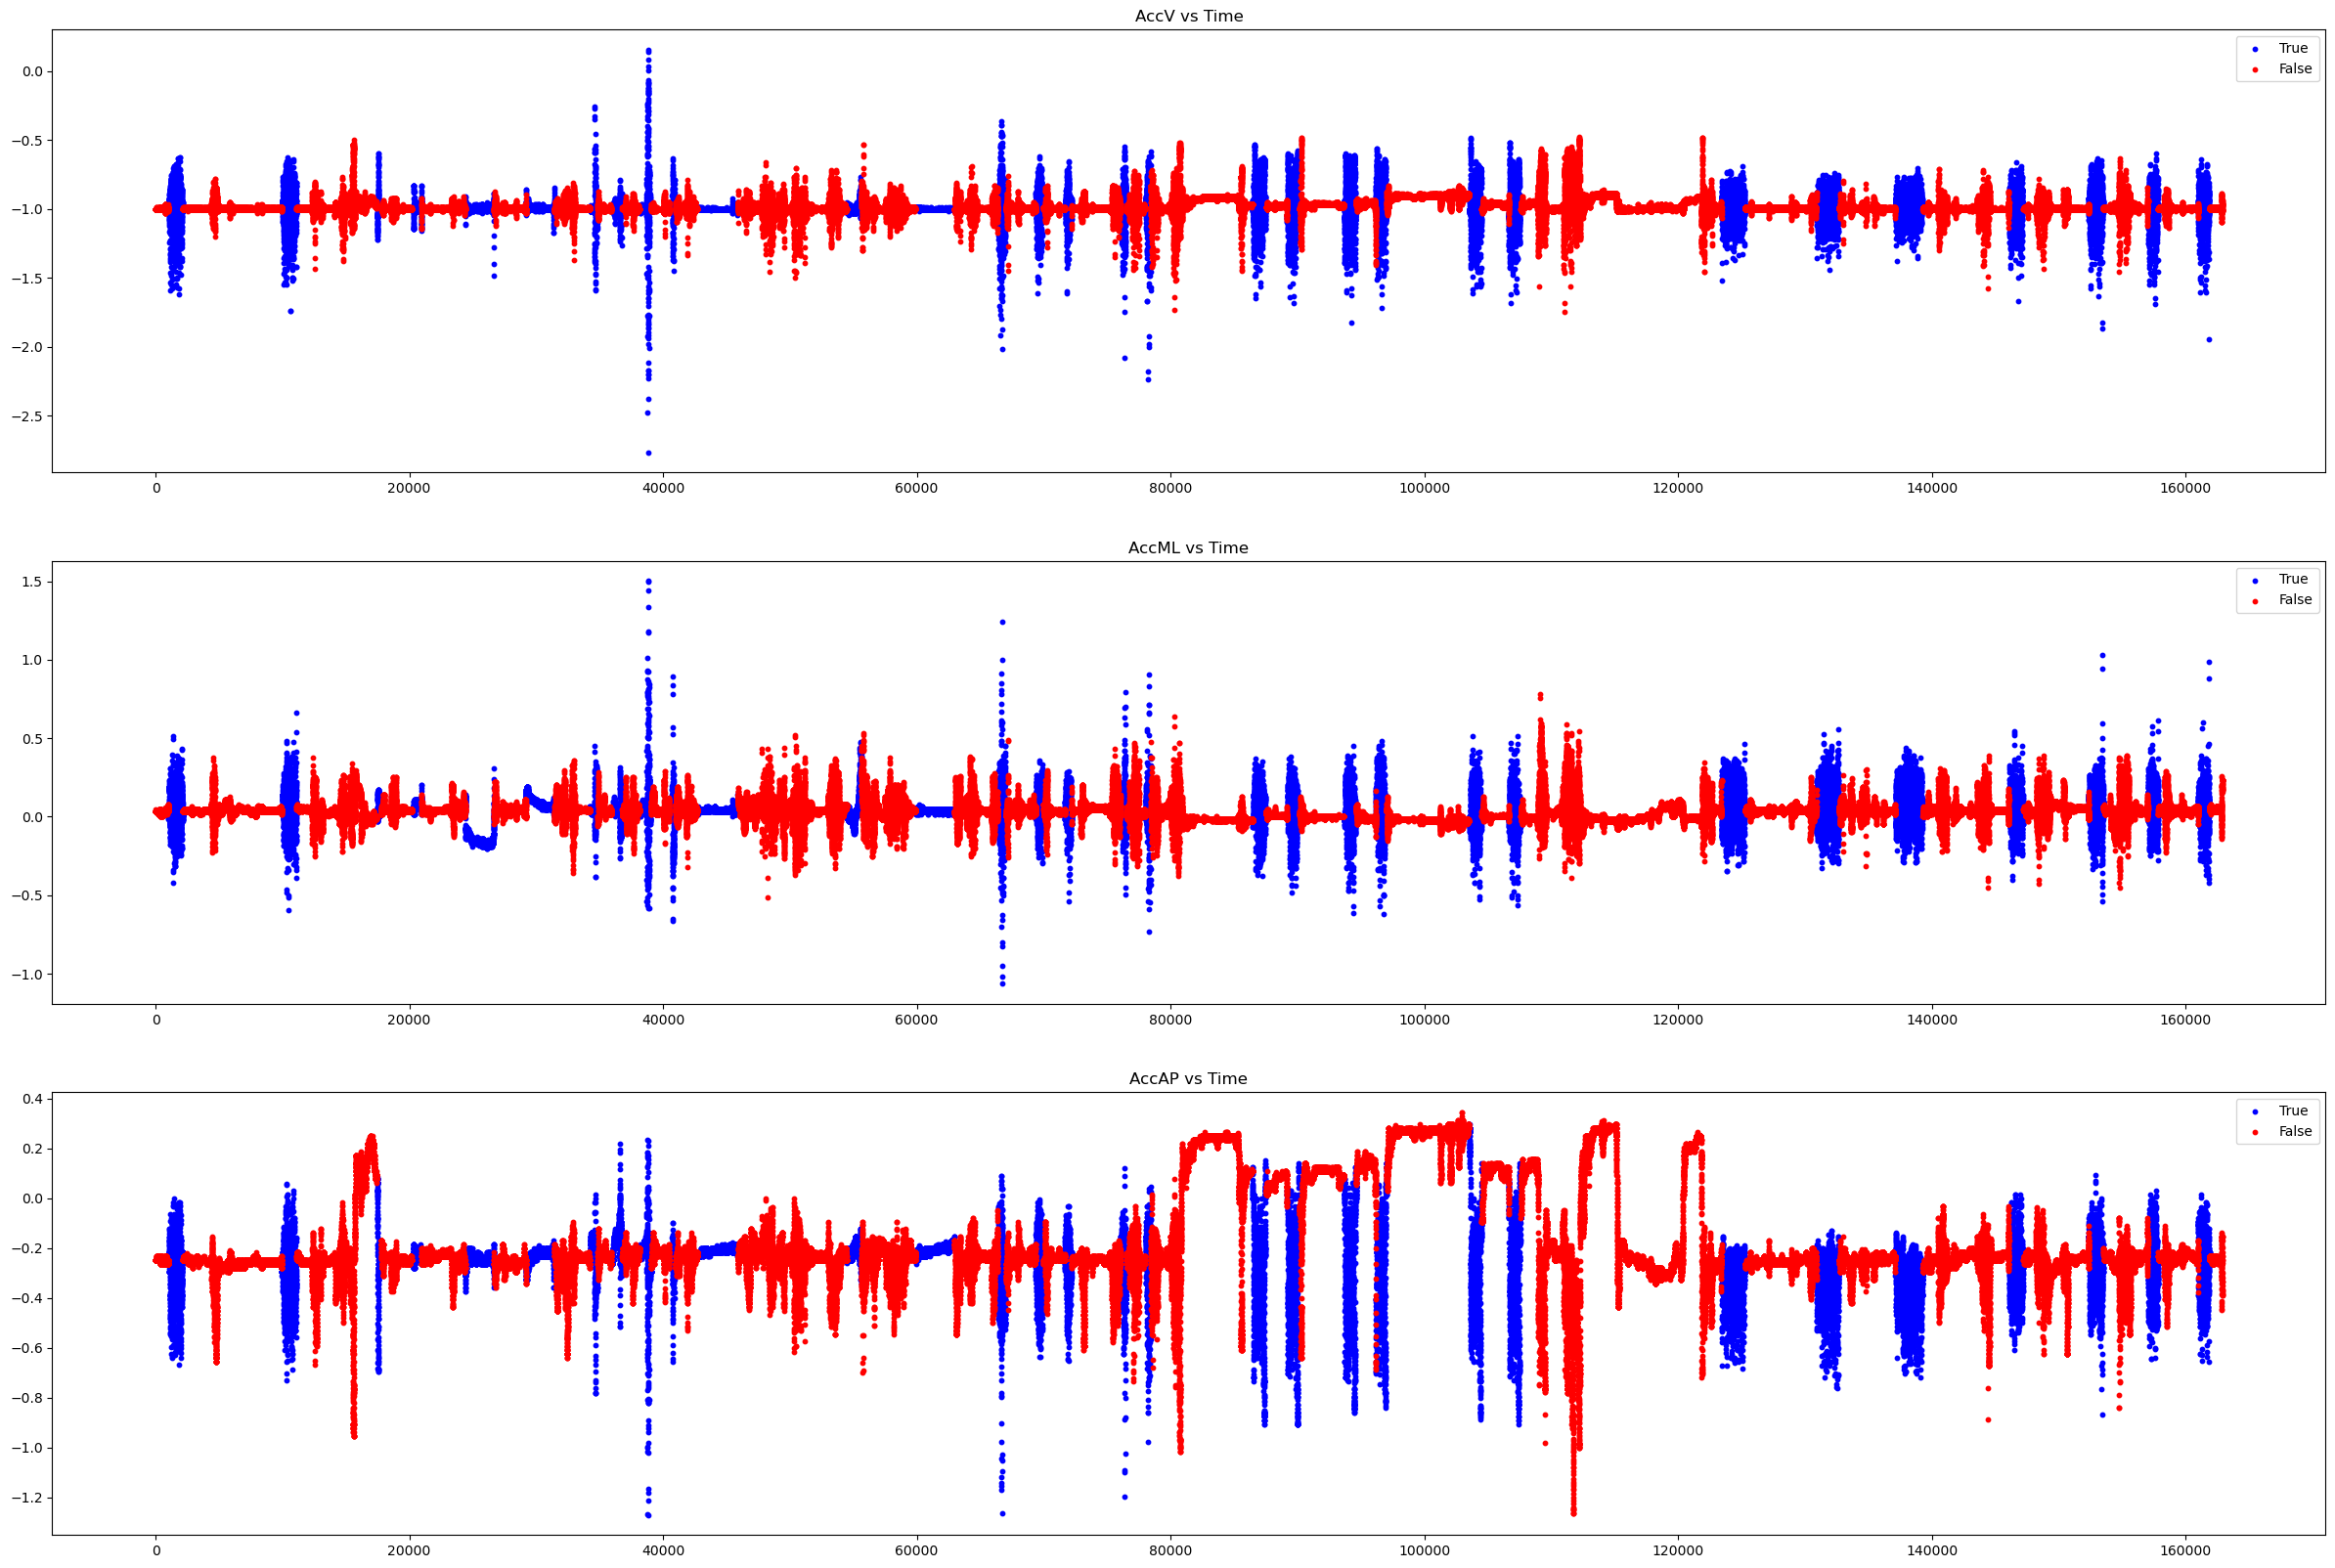

In [99]:

# Cuando se grafica en lineas las une cuando hay discontinuidad
# plt.plot(df_true['Time'], df_true['AccV'], 'b')
# plt.plot(df_false['Time'], df_false['AccV'],'r')
plt.figure(figsize=(30,20))
plt.subplot(3,1,1)
plt.scatter(df_true['Time'], df_true['AccV'], c='b', s=10)
plt.scatter(df_false['Time'], df_false['AccV'], c='r', s=10)
plt.legend(['True', 'False'], loc='upper right')
plt.title("AccV vs Time")

plt.subplot(3,1,2)
plt.scatter(df_true['Time'], df_true['AccML'], c='b', s=10)
plt.scatter(df_false['Time'], df_false['AccML'], c='r', s=10)
# plt.xlim(20000, 25000)
plt.legend(['True', 'False'], loc='upper right')
plt.title("AccML vs Time")

plt.subplot(3,1,3)
plt.scatter(df_true['Time'], df_true['AccAP'], c='b', s=10)
plt.scatter(df_false['Time'], df_false['AccAP'], c='r', s=10)
# plt.xlim(20000, 25000)
plt.legend(['True', 'False'], loc='upper right')
plt.title("AccAP vs Time")

## Visualización (TDCSFOG) / data collect in the lab

In [25]:
tdcsfog = pd.read_csv('test/tdcsfog/003f117e14.csv')
tdcsfog

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking
0,0,-9.533939,0.566322,-1.413525,0,0,0
1,1,-9.536140,0.564137,-1.440621,0,0,0
2,2,-9.529345,0.561765,-1.429332,0,0,0
3,3,-9.531239,0.564227,-1.415490,0,0,0
4,4,-9.540825,0.561854,-1.429471,0,0,0
...,...,...,...,...,...,...,...
4677,4677,-9.351431,0.370047,-2.286318,0,0,0
4678,4678,-9.341410,0.347721,-2.321991,0,0,0
4679,4679,-9.350667,0.361341,-2.297158,0,0,0
4680,4680,-9.343977,0.365726,-2.292650,0,0,0


Text(0.5, 1.0, 'AccAP vs Time')

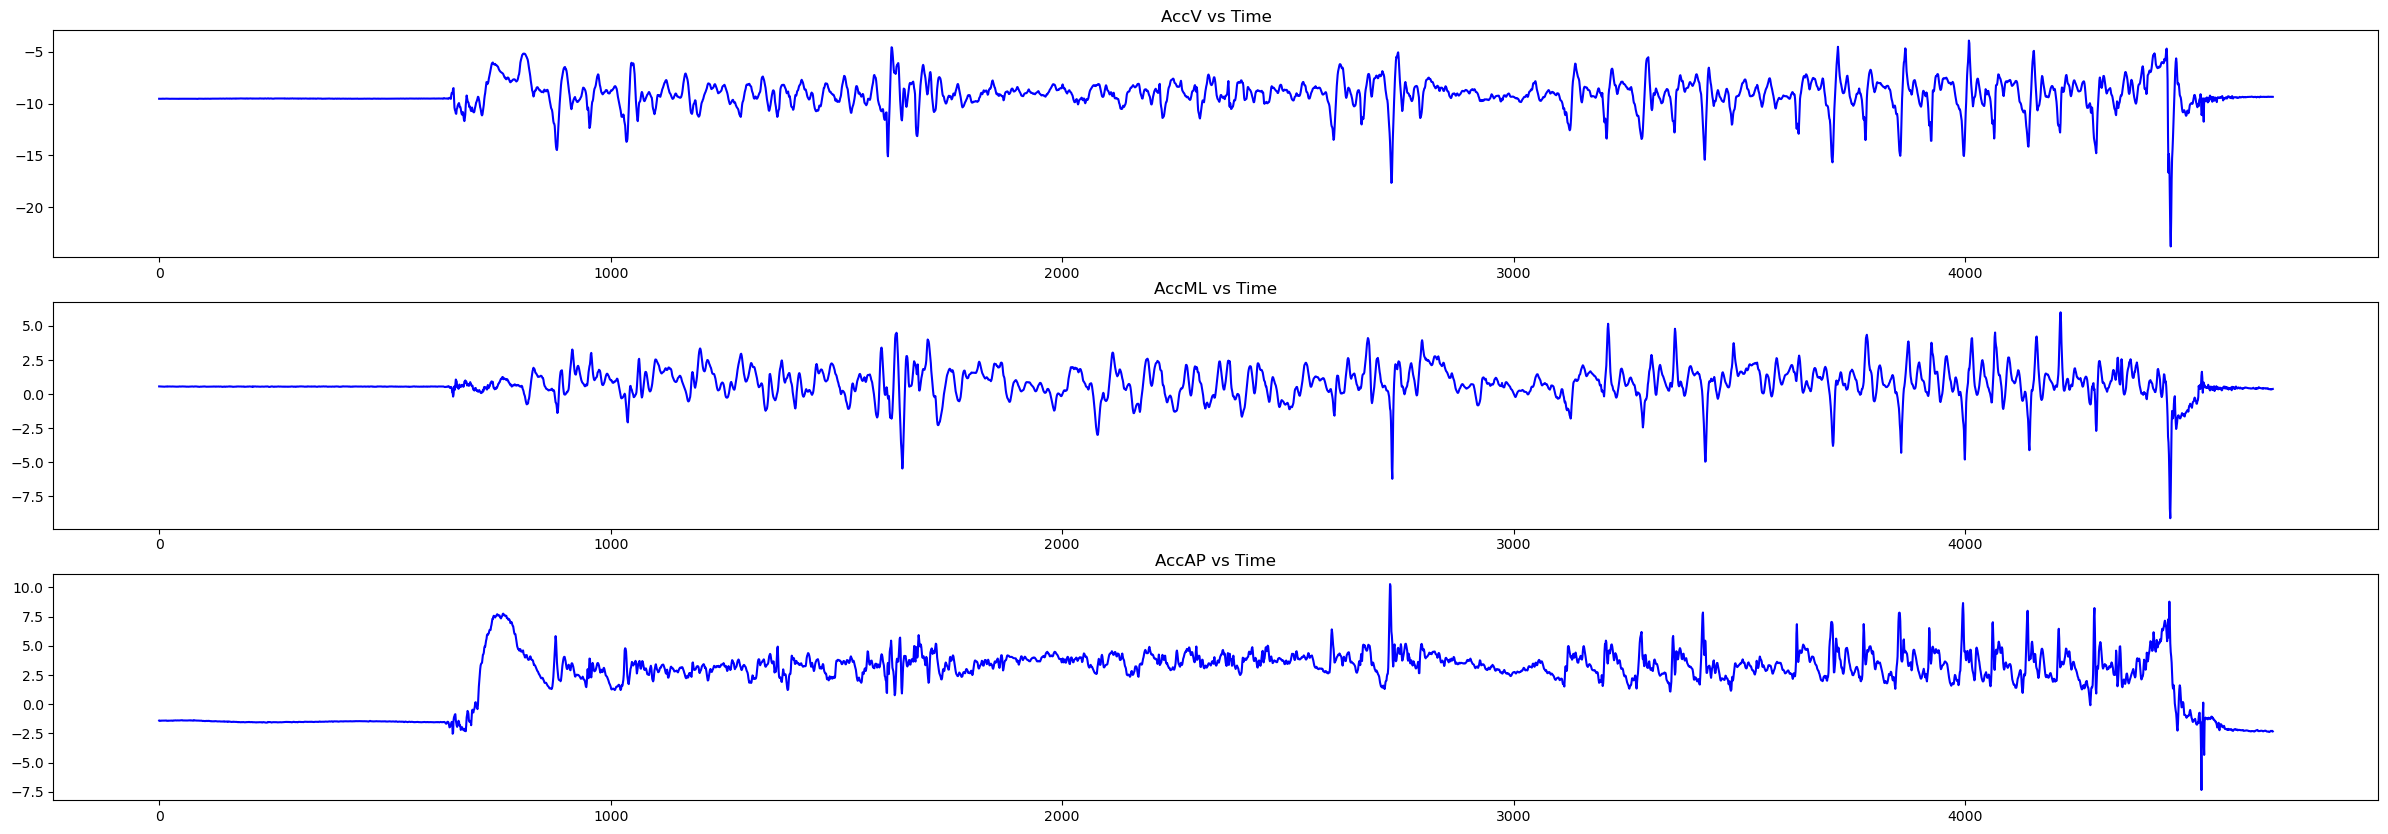

In [4]:
plt.figure(figsize=(30,10))
plt.subplot(3,1,1)
plt.plot(tdcsfog['Time'], tdcsfog['AccV'], 'b')
plt.title("AccV vs Time")

plt.subplot(3,1,2)
plt.plot(tdcsfog['Time'], tdcsfog['AccML'], 'b')
plt.title("AccML vs Time")

plt.subplot(3,1,3)
plt.plot(tdcsfog['Time'], tdcsfog['AccAP'], 'b')
plt.title("AccAP vs Time")

In [24]:
metadata_tdcsfog = pd.read_csv('test/tdcsfog_metadata.csv')
metadata_tdcsfog

,Id,Subject,Visit,Test,Medication
0,003f117e14,4dc2f8,3,2,on
1,009ee11563,f62eec,4,2,on
2,011322847a,231c3b,2,2,on
3,01d0fe7266,231c3b,2,1,off
4,024418ba39,fa8764,19,3,on
...,...,...,...,...,...
828,feba449e1a,312788,19,1,on
829,ff4f844fd3,af82b2,2,3,on
830,ff53514514,3b2403,2,3,on
831,ff92d9244d,2d57c2,20,2,on


In [42]:
tdcsfog = pd.DataFrame()

for root,dirs,files in os.walk("test/tdcsfog/"):
    i = 0
    for name in files:
        f = os.path.join(root,name)
        tdc_list_csv = pd.read_csv(f)
        if (tdc_list_csv["StartHesitation"][i] + tdc_list_csv["Turn"][i] + tdc_list_csv["Walking"][i] > 0 ):
            tdc_list_csv['null'] = 1
        else:
            tdc_list_csv['null'] = 0
        tdc_list_csv['file'] = name.split('.')[0]
        i = i + 1
        tdcsfog = pd.concat([tdcsfog,tdc_list_csv],axis=0)
        
        
tdcsfog

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,null,file
0,0,-9.533939,0.566322,-1.413525,0,0,0,0,003f117e14
1,1,-9.536140,0.564137,-1.440621,0,0,0,0,003f117e14
2,2,-9.529345,0.561765,-1.429332,0,0,0,0,003f117e14
3,3,-9.531239,0.564227,-1.415490,0,0,0,0,003f117e14
4,4,-9.540825,0.561854,-1.429471,0,0,0,0,003f117e14
...,...,...,...,...,...,...,...,...,...
3270,3270,-9.597593,0.311384,0.503316,0,0,0,0,024ba3ebd5
3271,3271,-9.620602,0.320365,0.502935,0,0,0,0,024ba3ebd5
3272,3272,-9.629403,0.316196,0.512173,0,0,0,0,024ba3ebd5
3273,3273,-9.624888,0.316130,0.505394,0,0,0,0,024ba3ebd5


(4000.0, 6000.0)

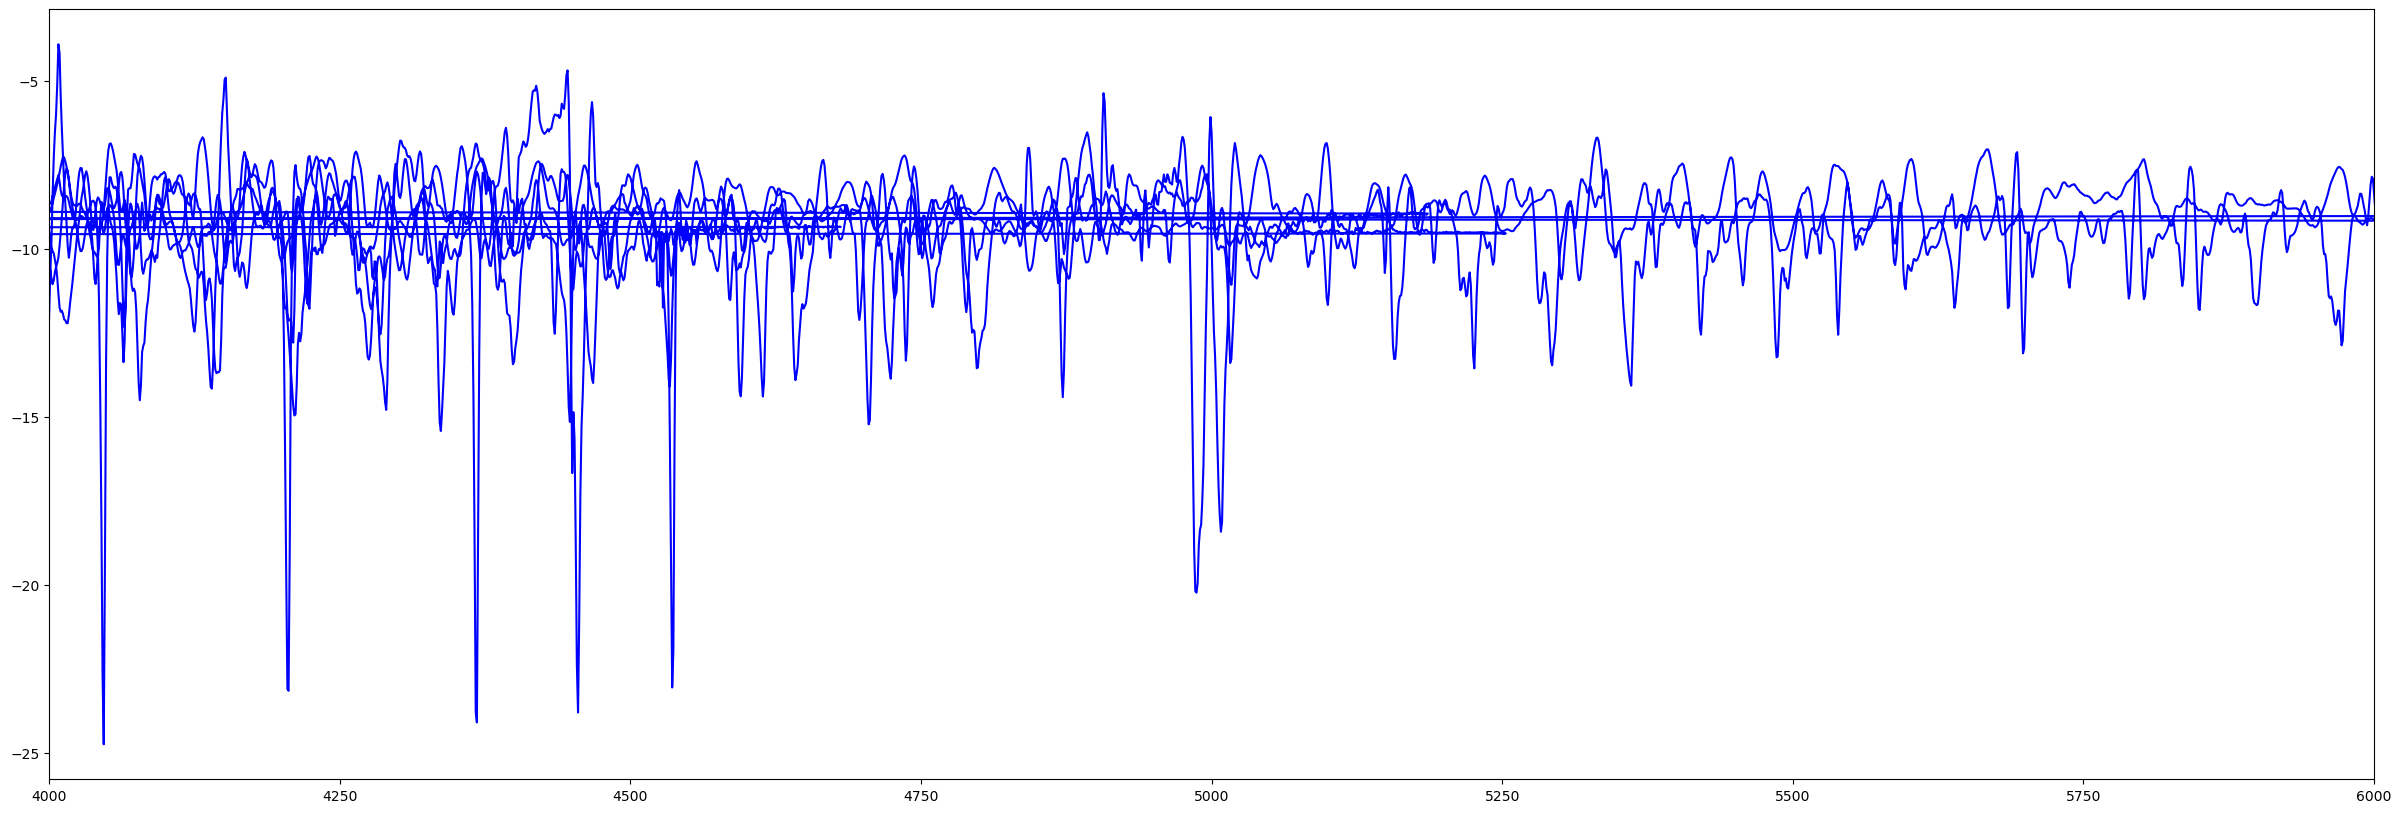

In [28]:
# Toda la data se junta
plt.figure(figsize=(30,10))
plt.plot(tdcsfog['Time'], tdcsfog['AccV'], 'b')
plt.xlim(4000, 6000)

In [44]:
tdcsfog_m= metadata_tdcsfog.merge(tdcsfog, how = 'inner', left_on = 'Id', right_on = 'file')
tdcsfog_m.drop(['file'], axis = 1, inplace = True)
tdcsfog_m

,Id,Subject,Visit,Test,Medication,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,null
0,003f117e14,4dc2f8,3,2,on,0,-9.533939,0.566322,-1.413525,0,0,0,0
1,003f117e14,4dc2f8,3,2,on,1,-9.536140,0.564137,-1.440621,0,0,0,0
2,003f117e14,4dc2f8,3,2,on,2,-9.529345,0.561765,-1.429332,0,0,0,0
3,003f117e14,4dc2f8,3,2,on,3,-9.531239,0.564227,-1.415490,0,0,0,0
4,003f117e14,4dc2f8,3,2,on,4,-9.540825,0.561854,-1.429471,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35433,024ba3ebd5,c85fdf,3,2,on,3270,-9.597593,0.311384,0.503316,0,0,0,0
35434,024ba3ebd5,c85fdf,3,2,on,3271,-9.620602,0.320365,0.502935,0,0,0,0
35435,024ba3ebd5,c85fdf,3,2,on,3272,-9.629403,0.316196,0.512173,0,0,0,0
35436,024ba3ebd5,c85fdf,3,2,on,3273,-9.624888,0.316130,0.505394,0,0,0,0


### Sequential Model

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = tdcsfog_m.drop(['Turn', 'Walking', 'StartHesitation','Id','Subject','Medication'], axis=1)
X

,Visit,Test,Time,AccV,AccML,AccAP,null
0,3,2,0,-9.533939,0.566322,-1.413525,0
1,3,2,1,-9.536140,0.564137,-1.440621,0
2,3,2,2,-9.529345,0.561765,-1.429332,0
3,3,2,3,-9.531239,0.564227,-1.415490,0
4,3,2,4,-9.540825,0.561854,-1.429471,0
...,...,...,...,...,...,...,...
35433,3,2,3270,-9.597593,0.311384,0.503316,0
35434,3,2,3271,-9.620602,0.320365,0.502935,0
35435,3,2,3272,-9.629403,0.316196,0.512173,0
35436,3,2,3273,-9.624888,0.316130,0.505394,0


In [56]:
y = tdcsfog_m[['Turn', 'Walking', 'StartHesitation', 'null']]
y

,Turn,Walking,StartHesitation,null
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
35433,0,0,0,0
35434,0,0,0,0
35435,0,0,0,0
35436,0,0,0,0


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Normalizar los conjuntos de entrenamiento y prueba
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Construir la arquitectura de la red neuronal
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=[X_train.shape[1]]),
    tf.dropout(0.2),
    tf.keras.layers.Dense(units=4, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
886/886 [==============================] - 5s 5ms/step - loss: 0.0834 - accuracy: 0.8402 - val_loss: 0.0674 - val_accuracy: 0.8023
Epoch 2/50
886/886 [==============================] - 4s 4ms/step - loss: 0.0610 - accuracy: 0.7755 - val_loss: 0.0637 - val_accuracy: 0.7400
Epoch 3/50
886/886 [==============================] - 4s 4ms/step - loss: 0.0582 - accuracy: 0.7370 - val_loss: 0.0601 - val_accuracy: 0.7063
Epoch 4/50
886/886 [==============================] - 4s 4ms/step - loss: 0.0581 - accuracy: 0.7105 - val_loss: 0.0613 - val_accuracy: 0.6879
Epoch 5/50
886/886 [==============================] - 4s 4ms/step - loss: 0.0579 - accuracy: 0.6880 - val_loss: 0.0693 - val_accuracy: 0.6824
Epoch 6/50
886/886 [==============================] - 4s 4ms/step - loss: 0.0602 - accuracy: 0.6701 - val_loss: 0.0677 - val_accuracy: 0.6895
Epoch 7/50
886/886 [==============================] - 3s 4ms/step - loss: 0.0618 - accuracy: 0.6538 - val_loss: 0.0688 - val_accuracy: 0.6733
Epoch 

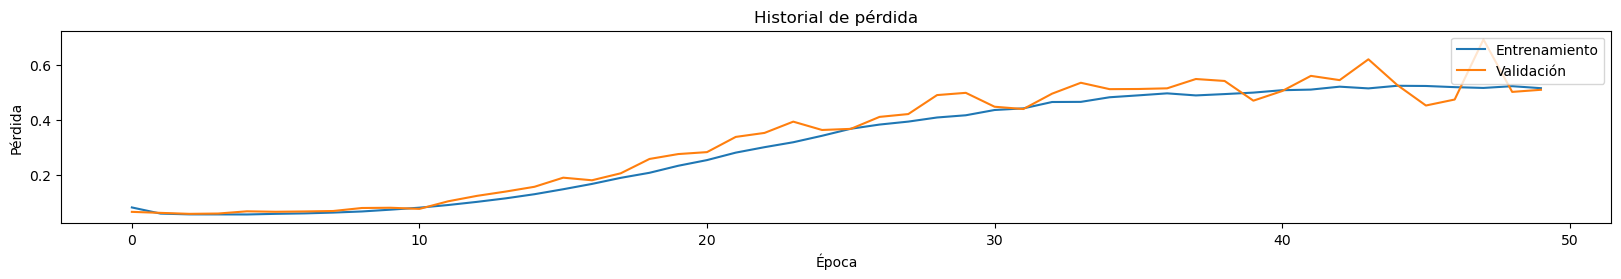

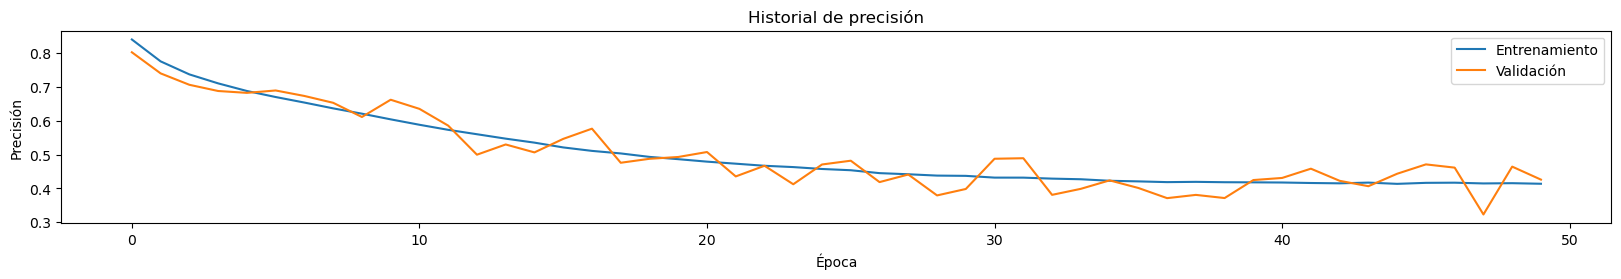

In [64]:
# trazar la pérdida del entrenamiento y la validación en un gráfico
plt.figure(figsize=(20,2.5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Historial de pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend(['Entrenamiento', 'Validación'], loc='upper right')
plt.show()

# trazar la precisión del entrenamiento y la validación en un gráfico
plt.figure(figsize=(20,2.5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Historial de precisión')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend(['Entrenamiento', 'Validación'], loc='upper right')
plt.show()

In [58]:
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
score = model.evaluate(X_test, y_test)
print('Loss:', score[0])
print('Accuracy:', score[1])

222/222 [==============================] - 1s 3ms/step - loss: 0.5097 - accuracy: 0.4261
Loss: 0.5097041130065918
Accuracy: 0.42607223987579346


## PRE-PROCESS DATA (NOTYPE)

In [108]:
notype = pd.read_csv('test/notype/02ab235146.csv')
# print(notype)
nt_true = df.loc[( notype["Task"] == 1 ) & ( notype['Valid'] == 1)]
nt_false = df.loc[( notype["Task"] == 0 ) & ( notype['Valid'] == 0)]


Text(0.5, 1.0, 'AccAP vs Time')

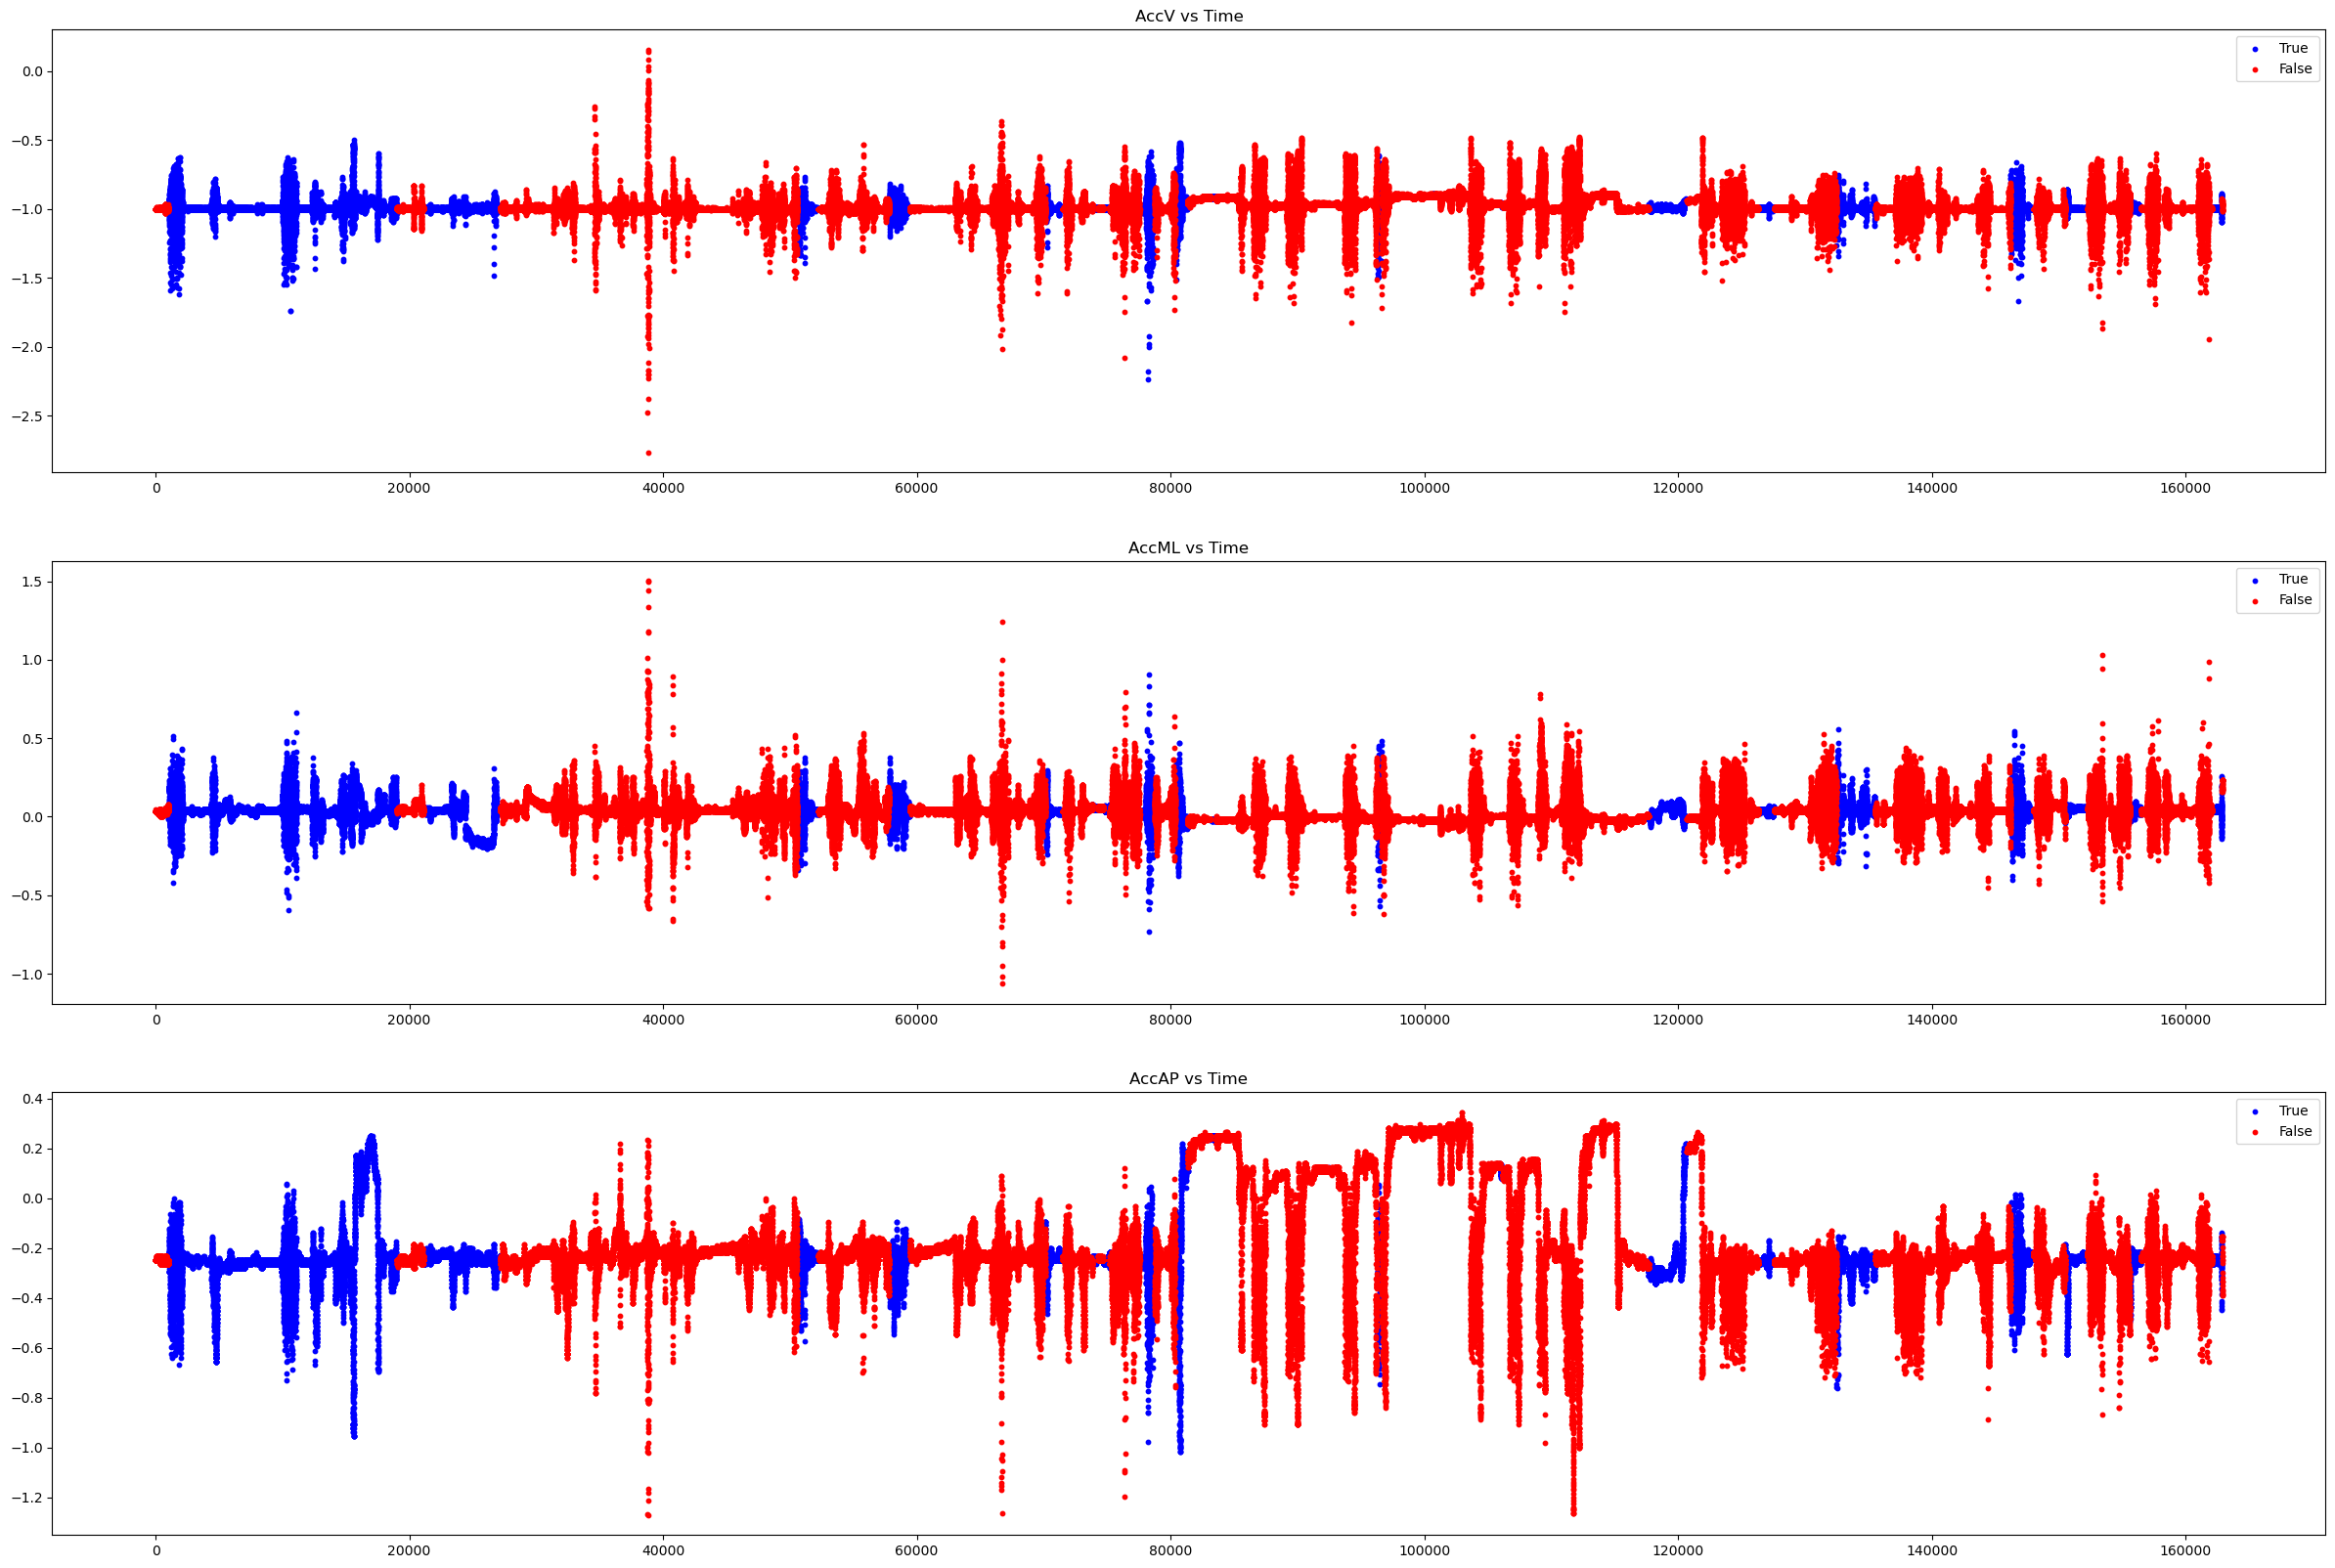

In [109]:
plt.figure(figsize=(30,20))
plt.subplot(3,1,1)
plt.scatter(nt_true['Time'], nt_true['AccV'], c='b', s=10)
plt.scatter(nt_false['Time'], nt_false['AccV'], c='r', s=10)
plt.legend(['True', 'False'], loc='upper right')
plt.title("AccV vs Time")

plt.subplot(3,1,2)
plt.scatter(nt_true['Time'], nt_true['AccML'], c='b', s=10)
plt.scatter(nt_false['Time'], nt_false['AccML'], c='r', s=10)
# plt.xlim(20000, 25000)
plt.legend(['True', 'False'], loc='upper right')
plt.title("AccML vs Time")

plt.subplot(3,1,3)
plt.scatter(nt_true['Time'], nt_true['AccAP'], c='b', s=10)
plt.scatter(nt_false['Time'], nt_false['AccAP'], c='r', s=10)
# plt.xlim(20000, 25000)
plt.legend(['True', 'False'], loc='upper right')
plt.title("AccAP vs Time")